## Interact with Webcam or Video File
連結：https://pythonprogramming.net/loading-images-python-opencv-tutorial/

學習：  
本節可以了解最基本的利用cv2來讀取照片，顯示照片，並且了解讀取之後的照片格式為numpy.ndarray，後續可以利用這個概念來做區域切片取樣。

函數：
* 照片讀取
    * cv2.imread(路徑, 讀入色彩格式)
* 檢閱照片
    * cv2.imshow(名稱, 照片)
* 關閉照片
    * cv2.waitKey(0) 任意鍵關閉
    * cv2.destroyAllWindows() 關閉所有視窗

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

IMREAD_GRAYSCALE:0，灰值圖  
IMREAD_COLOR:1，RGB  
IMREAD_UNCHANGED:-1，不變

In [32]:
#  img = cv2.imread('watch.jpg', 0)
img = cv2.imread('watch.jpg', cv2.IMREAD_GRAYSCALE)

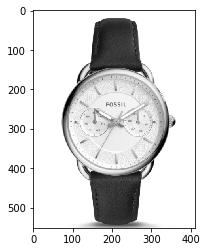

In [9]:
plt.imshow(img, cmap='gray')
plt.show()

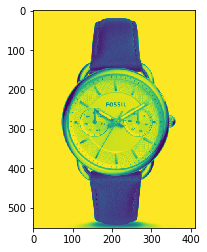

In [7]:
#  opencv讀入的格式為BGR，matplotlib讀入為RBG，有點差異
plt.imshow(img)
plt.show()

也可以利用`cv2.imshow`來顯示圖片，但是必需設置`cv2.waitKey`與`cv2.destroyAllWindows()`   
如果沒有按下任意鍵來關閉視窗的話，程序似乎會卡住等待。

In [4]:
cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

如果想保存照片的話可以利用`cv2.imwrite(格名, 物件)`

In [11]:
cv2.imwrite('hello_watch.jpg', img)

True

## Loading Video Source OpenCV Python Tutorial
https://pythonprogramming.net/loading-video-python-opencv-tutorial/

學習：  
本節可以學習到利用cv2來取得webcam連結，並透過webcam來做記錄，延伸應用可以利用webcam來做物體偵測。

函數：
* 取得webcam
    * cv2.VideoCapture()
* 色彩轉換
    * cv2.cvtColor(照片, 轉格格式)
* 影像錄製
    * cv2.VideoWriter_fourcc(編碼方式)
    * cv2.VideoWriter(檔案名稱, 編碼方式, fps, 影片大小, 是否彩色) 

In [12]:
#  0代表第一個webcam，如果有多個的話就可以設置1、2、...
cap = cv2.VideoCapture(0)

#  設置保存影像
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (648, 480))
while True:
    #  true/false, 擷取到的影像
    ret, frame = cap.read()
    
    #  將圖像轉成灰值圖
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #  保存影片
    out.write(frame)
    
    #  設置兩個imshow可以一次顯示兩個框架
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)
    
    #  設置迴歸中斷點
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break()
        
        
#  資源釋放    
cap.release()
out.release()
cv2.destroyAllWindows()

## Drawing and Writing on Image OpenCV Python Tutorial
https://pythonprogramming.net/drawing-writing-python-opencv-tutorial/

學習：  
利用opencv在圖片上畫上直線、方框、加入文字...等。

函數：
* 畫直線
    * cv2.line(來源照片, 起始座標, 結束座標, 顏色, 線粗)    
* 畫方框
    * cv2.rectangle(來源照片, 左上角座標, 右下角座標, 顏色, 線粗)  
* 畫圖
    * cv2.circle(來源照片, 中心點, 半徑, 顏色, 線粗)  
* 畫多邊形
    * cv2.polylines(來源照片, [座標點], bool(圖形是否封閉), 顏色, 線粗)  
* 加入文字
    * cv2.putText(來源照片, 說明文字, 座標, 字形, 字體大小, 顏色, 線粗, 線類別)

註一：顏色為BGR，非RGB  
註二：線粗設置-1為填滿，多邊形無法填滿  
註三：文字字體大小可以設置小數點

In [35]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)

#  畫直線
cv2.line(img, (0, 0), (150, 150), (0, 255, 0), 15)


cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)
#  畫框
cv2.rectangle(img, (10,10), (100,100), (0, 0, 0), 1)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)
#  畫圓
cv2.circle(img, (50, 50), 20, (0, 0, 0), -1)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)

#  設置多邊形座標
pts = np.array([[10, 5], [20, 30], [30, 40], [40, 45], [50,10]])
#  多邊形
cv2.polylines(img, [pts], True, (0,0,0), 1)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
#  圖片上設置文字說明
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)
#  設置字形
font = cv2.FONT_HERSHEY_SIMPLEX
#  建議使用cv2.LINE_AA，字體線較為清晰
cv2.putText(img, 'Hello CV!', (30, 50), font, 1, (255, 0, 0), 1, cv2.LINE_AA)
cv2.putText(img, 'Hello CV!', (30, 80), font, 1, (255, 0, 0), 1, cv2.LINE_8)
cv2.putText(img, 'Hello CV!', (30, 110), font, 1, (255, 0, 0), 1, cv2.LINE_4)

cv2.imshow('image', img)
#  設置0代表任意鍵可關閉
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image Operations OpenCV Python Tutorial
https://pythonprogramming.net/image-operations-python-opencv-tutorial/

學習：  
照片讀入之後所取得的陣列即為`numpy.ndarray`格式，也因此可以做切片般操作來取得某個pixel，或是某個照片區域，取得的照片區域也可以利用'cv2.imwrite'來另存。

函數：
* 保存圖片
    * cv2.imwrite(格案名稱, 來源)

In [14]:
#  載入需求套件
import numpy as np
import cv2

#  讀入照片
img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)

In [7]:
#  取得某個座標上的顏色
px = img[100, 200]
#  如同操作list般，你也可以直接變更這個px的值
img[100, 200] = [0, 0, 0]

print(px)

[0 0 0]


In [9]:
#  照片讀入之後，是一個numpy ndarray的格式
type(img)

numpy.ndarray

In [10]:
#  對照片做區域選擇
roi = img[100:200, 200:400]
cv2.imshow('img', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
cv2.imwrite('watch_roi.jpg', roi)

True

In [12]:
#  或是直接將整個照片區域性的調整顏色
img[100:200, 200:400]=[255, 255, 255]
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
#  區域複製，先利用roi取得區域像素值之後，再重新賦值給img
#  注意選擇區域大小與貼上區域大小要相同

roi = img[100:200, 200:400]
img[0:100, 0:200] = roi
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image arithmetics and Logic OpenCV Python Tutorial
https://pythonprogramming.net/image-arithmetics-logic-python-opencv-tutorial/

學習：  
利用兩張大小相同的照片來做操作，圖片取自pythonprogran.net，此節課程可以比較直接兩張大小相同的照片相加與利用`cv2.add`及其它opencv內置的相加操作的差異性。  
另外也會了解利用閥值`cv2.threshold`來做前後背景的二值化，再透過邏輯計算的方式來將前後景合併在一起。

函數：  
* 照片合併
    * cv2.add(照片1, 照片2)  
    * cv2.addWeighted(照片1, 權重比, 照片2, 權重比, gamma)  
* 閥值二值化
    * cv2.threshold(照片, 閥值, 二值化結果的最大值, 二值化操作類別)
        * 二值化操作類別可以參考[阿洲說明](http://monkeycoding.com/?p=593)
* 邏輯計算
    * cv2.bitwise_not(照片) 
        * 將照片做not，二值化的照片會反轉黑白效果
    * cv2.bitwise_and(照片1, 照片2, mask=遮罩)
        * 將兩張照片做and

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('cv_course_pic1.jpg')
img2 = cv2.imread('cv_course_pic2.jpg')
img3 = cv2.imread('cv_course_pic3.jpg')

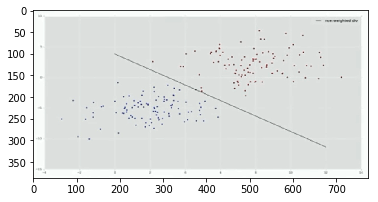

In [26]:
plt.imshow(img1)

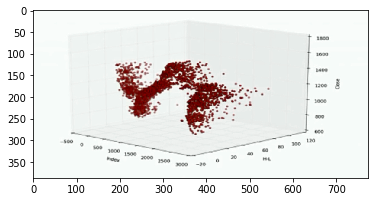

In [27]:
plt.imshow(img2)

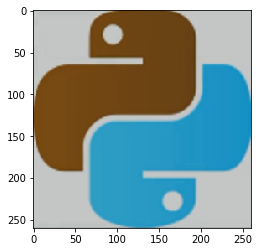

In [28]:
plt.imshow(img3)

In [17]:
#  確認兩張圖的大小要一致
#  直接相加的情況下會發現，兩張照片疊視效果不是很好
add = img1+img2
cv2.imshow('add', add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
#  改利用cv2.add
#  當pixel值大於255的時候，就會直接以255來記錄，整個背就白了
add = cv2.add(img1, img2)
cv2.imshow('add', add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
#  利用cv2.addWeighted來加入權重與gamma調控
weight = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
cv2.imshow('weight', weight)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [97]:
#  將logo置入img1的左上角
#  imshow再依需求取消註解觀看圖片變化
#  取得logo的大小
# cv2.imshow('img3', img3)
# cv2.imshow('img2', img2)
rows, cols, channels = img3.shape
#  依logo大小取img1的左上角
roi = img2[0:rows, 0:cols]
# cv2.imshow('roi', roi)
#  圖片轉灰值
img3gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
#  設置閥值，過閥值為0(黑)，低於則為255(白)
ret, mask = cv2.threshold(img3gray, 190, 255, cv2.THRESH_BINARY_INV)
# cv2.imshow('mask', mask)
mask_inv = cv2.bitwise_not(mask)
# cv2.imshow('mask_inv', mask_inv)
img2_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
# cv2.imshow('img2_bg', img2_bg)
img3_fg = cv2.bitwise_and(img3,img3, mask=mask)
# cv2.imshow('img3_fg', img3_fg)
dst = cv2.add(img2_bg, img3_fg)
# cv2.imshow('dst', dst)
img2[0:rows, 0:cols] = dst
cv2.imshow('img22', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Thresholding OpenCV Python Tutorial
https://pythonprogramming.net/thresholding-image-analysis-python-opencv-tutorial/

學習：  
原始照片是一張黑黑的幾乎看不到內容的書本內容，以`cv2.threshold`來調整似乎還是無法有效的讓內容還原，因為`cv2.threshold`是單純的自己這個pixel去轉變，透過`cv2.adaptiveThreshold`以區域的方式來計算還原，可以得到更好的效果。

函數：
* cv2.adaptiveThreshold(照片, 最大值, 區域閥值計算方式, 二值化類型, 多少pixel一個區域, 計算閥值的時候要減掉的值)
    * 需注意到照片必需為單通道的照片(rgb為三通道)

參考來源：[阿洲的程式教學](http://monkeycoding.com/?p=603)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

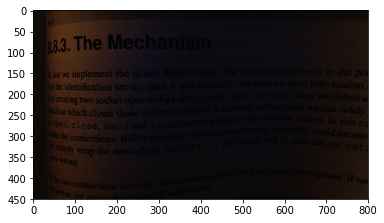

In [8]:
img = cv2.imread('bookpage.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

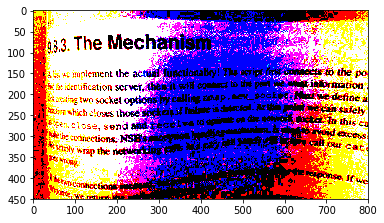

In [14]:
#  透過cv2.threshold來將低於閥值的pixel做處理
#  執行之後可以發現照片紅藍紫綠，這是因為我們沒有將照片做二值化或灰階處理
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('original', img)
cv2.imshow('threshold', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))

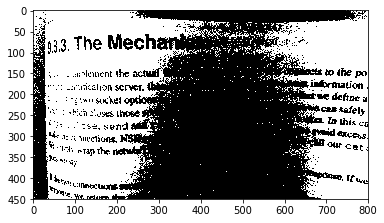

In [13]:
#  重新以灰度圖處理
#  重新產生圖面已經是黑白效果，但是中間的文字是一片黑的不清不楚
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(img_gray, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('original', img)
cv2.imshow('threshold', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(threshold, cmap='gray')

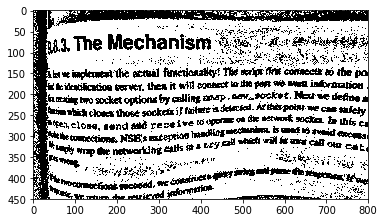

In [15]:
#  改以adaptiveThreshold來應用其它的閥值設置，可以看的出來文字內容了
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaus = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('threshold', gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(gaus, cmap='gray')

## Color Filtering OpenCV Python Tutorial
https://pythonprogramming.net/color-filter-python-opencv-tutorial/

學習：  
這節主要學習利用opencv做一個遮罩來過濾掉不希望出現的顏色(色彩分離)，原始範例是使用webcam去取得影像，但是沒有webcam的話就直接找一張圖來練習即可。  
練習中也提到了透過HSV來更精確的取得色彩，並搭配`cv2.inRange`來設置區域閥值，濾掉不需要的資訊，最後再利用`cv2.bitwise_and`做邏輯計算來抽出顏色。


[HSV](https://zh.wikipedia.org/wiki/HSL%E5%92%8CHSV%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4)  
    HSV即色相、飽和度、明度（英語：Hue, Saturation, Value）(維基百科)    

函數：
* 閥值區間
    * cv2.inRange(照片, 低\_閥值, 高\_閥值)
        * 低或高於閥值都變更為0，區間內為255
        * 色相的部份是0-360，但cv2中的計算方式H為H/2


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

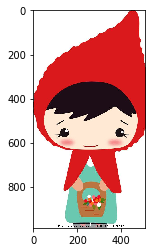

In [54]:
img = cv2.imread('redhat.jpg', 1)
#  記得opencv讀入是BGR格式，沒調整的話會變藍瘦香菇
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [ ]:
#  HSV即色相、飽和度、明度（英語：Hue, Saturation, Value）(維基百科)
#  將圖片轉hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#  設置閥值區間 
lower_mask = np.array([0, 180, 120])
upper_mask = np.array([180, 255, 220])
mask = cv2.inRange(hsv, lower_mask, upper_mask)

#  邏輯計算and
res = cv2.bitwise_and(img, img, mask=mask)
res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
#  檢驗
cv2.imshow('img', img)
cv2.imshow('mark', mask)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(res2)

## Blurring and Smoothing OpenCV Python Tutorial
https://pythonprogramming.net/blurring-smoothing-python-opencv-tutorial/?completed=/color-filter-python-opencv-tutorial/

學習：  
接續著上例，利用各種不同的filter、blur來優化顯影效果。

函數：  
* filter(參考來源：[Antares教程](http://www.studyai.com/article/bdd7155e94994b3cac05d107aae3ae12))
    * filter2D(照片, 輸出圖像深度(一般設置-1，代表維度原圖深度), kernel)
        * 透過設置的kernel來做卷積計算
        * 其它參數
            * anchor:指定kernel錨點，預設中心點
            * delta:卷積之後加入delta的值
            * borderType:邊界擴充方式，預設為對稱
    * bilateralFilter
* blur
    * 線性([阿洲的程式教學](http://monkeycoding.com/?p=570))
        * 有固定參數的kernel
        * GaussianBlur(照片, kernel大小, x的標準差, y的標準差)
            * 愈靠近中心權重愈大
            * 標準差設置太大會得到與blur相同效果，太小會沒效果，需多次調校
        * blur(照片, kernel大小)
            * kernel內的像素取平均值，如果是3x3的kernel則每一pixel為1/9
            * kernel愈大愈容易產生模糊感
    * 非線性([阿洲的程式教學](http://monkeycoding.com/?p=575))
        * 無固定參數的kernl
        * medianBlur(照片, kernel大小)
            * 中值濾波，將範圍內的像素排序之後以中值替換掉當值的pixel
            * 造成的模糊較GaussianBlur來的低
        * bilateralFilter(照片, 鄰域直徑大小, sigmaColor, sigmaSpace)         
            * 使照片模糊但同時可以保留影像邊緣
            * 以距離決定權重(d)加上像素色差決定權重
            * 只能處理CV_8UC1、CV_8UC3、CV_32FC1、CV_32FC3
            * 參考來源：[逍遙文工作室](https://cg2010studio.com/2012/10/14/%E9%9B%99%E9%82%8A%E6%BF%BE%E6%B3%A2%E5%99%A8-bilateral-filter/)
            

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

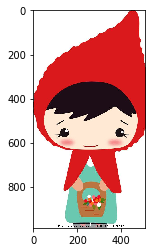

In [2]:
img = cv2.imread('redhat.jpg', 1)
#  記得opencv讀入是BGR格式，沒調整的話會變藍瘦香菇
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

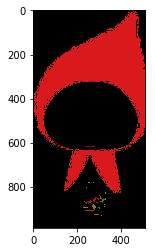

In [3]:
#  HSV即色相、飽和度、明度（英語：Hue, Saturation, Value）(維基百科)
#  將圖片轉hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#  設置閥值區間 
lower_mask = np.array([0, 180, 120])
upper_mask = np.array([180, 255, 220])
mask = cv2.inRange(hsv, lower_mask, upper_mask)

#  邏輯計算and
res = cv2.bitwise_and(img, img, mask=mask)
res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res2)

#  下面是我們最後提取出紅色的結果

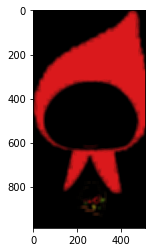

In [5]:
#  利用filter2D來做一次類似卷積的計算?
#  定義一個15x15的全1矩陣再/225個pixel
kernel = np.ones((15,15), np.float32)/225
smoothed = cv2.filter2D(res, -1, kernel)
cv2.imshow('smoothed', smoothed)
cv2.waitKey(0)
cv2.destroyAllWindows()
smoothed2 = cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB)
plt.imshow(smoothed2)

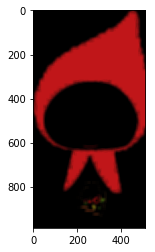

In [6]:
#  利用filter2D來做一次類似卷積的計算?
#  定義一個15x15的全1矩陣再/255
kernel = np.ones((15,15), np.float32)/255
smoothed = cv2.filter2D(res, -1, kernel)
cv2.imshow('smoothed', smoothed)
cv2.waitKey(0)
cv2.destroyAllWindows()
smoothed2 = cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB)
plt.imshow(smoothed2)

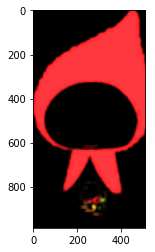

In [13]:
#  利用filter2D來做一次類似卷積的計算?
#  定義一個15x15的全1矩陣再/255
kernel = np.ones((15,15), np.float32)/100
smoothed = cv2.filter2D(res, -1, kernel)
cv2.imshow('smoothed', smoothed)
cv2.waitKey(0)
cv2.destroyAllWindows()
smoothed2 = cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB)
plt.imshow(smoothed2)

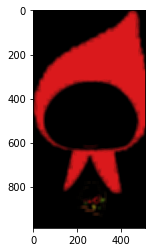

In [28]:
#  blur
#  相較下面的gaussianblur，有了較大的模糊感
blur = cv2.blur(res,(15,15))
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()
blur2 = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
plt.imshow(blur2)

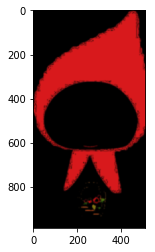

In [34]:
#  GaussianBlur
gaussianblur = cv2.GaussianBlur(res,(15,15),0, 0)
cv2.imshow('Gaussian Blurring',gaussianblur)
cv2.waitKey(0)
cv2.destroyAllWindows()
gaussianblur2 = cv2.cvtColor(gaussianblur, cv2.COLOR_BGR2RGB)
plt.imshow(gaussianblur2)

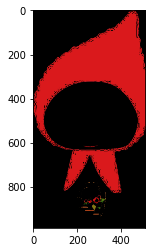

In [35]:
#  GaussianBlur
#  也可以將kernel設置為0，給予標準差之後由opencv2自行決定kernel
gaussianblur = cv2.GaussianBlur(res,(0,0),1, 1)
cv2.imshow('Gaussian Blurring',gaussianblur)
cv2.waitKey(0)
cv2.destroyAllWindows()
gaussianblur2 = cv2.cvtColor(gaussianblur, cv2.COLOR_BGR2RGB)
plt.imshow(gaussianblur2)

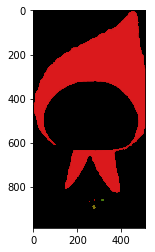

In [19]:
#  medianBlur
median = cv2.medianBlur(res,15)
cv2.imshow('Median Blur',median)
cv2.waitKey(0)
cv2.destroyAllWindows()
median2 = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
plt.imshow(median2)

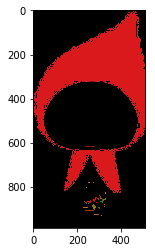

In [44]:
#  bilateralFilter
bilateral = cv2.bilateralFilter(res,5,1,10)
cv2.imshow('bilateral Blur',bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()
bilateral2 = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)
plt.imshow(bilateral2)

## Morphological Transformations OpenCV Python Tutorial
https://pythonprogramming.net/morphological-transformation-python-opencv-tutorial/

學習：
這節課可以了解到利用Erosion(侵蝕)與Dilation(膨脹)來達成形態的轉換，阿洲的程式教學內寫到了，形態學用於『二值化』後的影像，用來凸顯影像的形狀特徵，像邊界與連通區域。同事處理一個案子在計算區域面積的時候也應用了膨脹的方式來連通區域，以此計算異常百分比。  
這兩種執行方式都是設置一個kernel，然後以slider的方式來計算
* Erosion當所有的pixel都是白的，那就是白的，反之則黑，這可以消除部份白色噪點
* Dilation當所有的pixel都是黑的，那就是黑的，反之則白，這可以消除部份黑色噪點

另外一組相對應用的是erosion與dilation的複合應用
* open
    * 消除FP的值
    * 先erosion後dilation
* close
    * 消除FN的值
    * 先dilation後erosion


註：kernel的設置通常為奇數矩陣，範例為5x5

函數：[阿洲的程式教學](http://monkeycoding.com/?p=577)
* 侵蝕與膨脹
    * erode(照片, kernel, 執行次數)
    * dilate(照片, kernel, 執行次數)
* 複合應用
    * morphologyEx
        * cv2.morphologyEx(照片, cv2.MORPH_OPEN, kernel)
        * cv2.morphologyEx(照片, cv2.MORPH_CLOSE, kernel)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

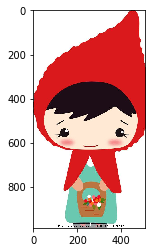

In [3]:
img = cv2.imread('redhat.jpg', 1)
#  記得opencv讀入是BGR格式，沒調整的話會變藍瘦香菇
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

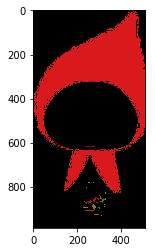

In [4]:
#  HSV即色相、飽和度、明度（英語：Hue, Saturation, Value）(維基百科)
#  將圖片轉hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#  設置閥值區間 
lower_mask = np.array([0, 180, 120])
upper_mask = np.array([180, 255, 220])
mask = cv2.inRange(hsv, lower_mask, upper_mask)

#  邏輯計算and
res = cv2.bitwise_and(img, img, mask=mask)
res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res2)

#  下面是我們最後提取出紅色的結果

In [5]:
#  unit8:無符號 0-255的整數
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(mask, kernel, iterations=1)
dilation = cv2.dilate(mask, kernel, iterations=1)

cv2.imshow('mask', mask)
cv2.imshow('erosion', erosion)
cv2.imshow('dilation', dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()

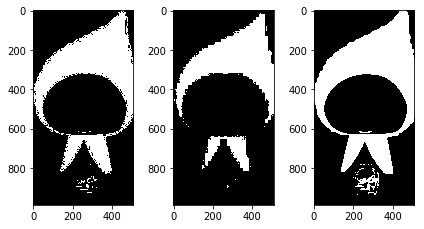

In [6]:
#  觀察原始、侵蝕、膨脹的變化
plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.subplot(132)
plt.imshow(erosion, cmap='gray')
plt.subplot(133)
plt.imshow(dilation, cmap='gray')
plt.tight_layout()

In [7]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
colsing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

cv2.imshow('mask', mask)
cv2.imshow('opening', opening)
cv2.imshow('colsing', colsing)

cv2.waitKey(0)
cv2.destroyAllWindows()

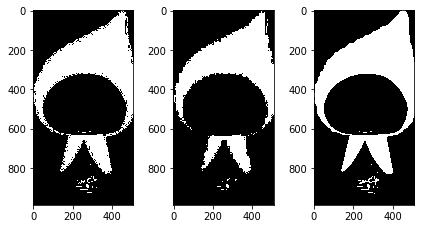

In [8]:
plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.subplot(132)
plt.imshow(opening, cmap='gray')
plt.subplot(133)
plt.imshow(colsing, cmap='gray')
plt.tight_layout()

## Canny Edge Detection and Gradients OpenCV Python Tutorial
https://pythonprogramming.net/canny-edge-detection-gradients-python-opencv-tutorial/?completed=/morphological-transformation-python-opencv-tutorial/

學習：  
了解邊緣檢測的應用    

函數：
* Laplacian(照片, 深度, ksize)
    * ksize預設為1，必需設置正整數1,3,5,7
    * 深度
        * CV_8U->支援CV_8U、CV_16S、CV_32F、CV_64F
        * CV_16U->支援CV_16U、CV_32F、CV_64F
* Sobel(照片, 深度, x方向的微分階數, y方向的微分階數, ksize)        
    * ([阿洲的程式教學](http://monkeycoding.com/?p=632))
    * 帶方向，所以可以於參數設置
    * ksize預設為1，必需設置正整數1,3,5,7
    * 範例中使用CV_16S的原因是Sobel求完導數之後會有負值，並且會大於255，原圖為8位元不帶符號，所以改以16位帶符號來處理。
* Canny(照片, threshold1, threshold2, Sobel核心, 是否使用L2范數計算(bool)        

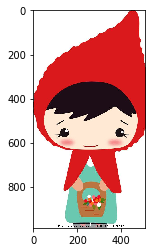

In [3]:
img = cv2.imread('redhat.jpg', 1)
#  記得opencv讀入是BGR格式，沒調整的話會變藍瘦香菇
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

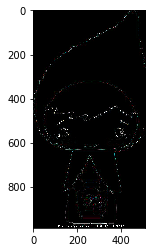

In [4]:
#  邊緣檢測
laplacian = cv2.Laplacian(img,cv2.CV_8U, 3)

cv2.imshow('img', img)
cv2.imshow('laplacian', laplacian)

cv2.waitKey(0)
cv2.destroyAllWindows()
#  用opencv開窗觀看較為清楚
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))

In [51]:
#  如果可以的話就測試不同的參數
sobelx = cv2.Sobel(img,cv2.CV_16S,1,0,ksize=5)
cv2.imshow('sobelx', sobelx)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
#  如果可以的話就測試不同的參數
sobely = cv2.Sobel(img,cv2.CV_16S,0,1,ksize=5)
cv2.imshow('sobely', sobely)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
sobelx = cv2.Sobel(img,cv2.CV_16S,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_16S,0,1,ksize=5)

#  轉回uint8
absX = cv2.convertScaleAbs(sobelx)
absY = cv2.convertScaleAbs(sobely)

dst = cv2.addWeighted(absX,0.1,absY,0.1,10)
cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#  預設情況下只要有照片、跟threshold1與threshold2即可
edges = cv2.Canny(img,100,200)
cv2.imshow('Edges',edges)
    
cv2.waitKey(0)
cv2.destroyAllWindows()  

## 資源
[OpenCV-Python中文教程](https://www.kancloud.cn/aollo/aolloopencv/269602)  
[阿洲的程式教學](http://monkeycoding.com/)  
[阿洲的程式教學\影像格式](http://monkeycoding.com/?p=531)  
[OpenCV-Python-Tutorial](https://github.com/makelove/OpenCV-Python-Tutorial)  